<a href="https://colab.research.google.com/github/erdogan98/DATA_SCIENCE/blob/main/A1_coursework_template2_MSc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **COMP6685 Deep Learning Coursework A1**


Individual (25% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-38bab34c-8b74-32e4-db41-7ac52655614b)


Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [3]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 17.0 MB/s eta 0:00:00


In [4]:
#import all the necessary libraries
import visualkeras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalizationV2
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger
#from livelossplot import PlotLossesKeras
from tensorflow.keras import utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers

In [ ]:
!pip list --format=freeze > requirements.txt

In [5]:
#downloading and splitting the data into training and testing parts
(X, y), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
from keras.utils.np_utils import to_categorical
#preprocessing the images into required dimensions with color depth
#as the images are greyscale we only need 1 color channel
X_train = X.reshape(-1,28,28,1)
y_train = to_categorical(y, num_classes=10)

X_test = X_test.reshape(-1,28,28,1)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
#finding out the dimensions of the images
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

Visualise a random sample image of the dataset. **(5 marks)**

---



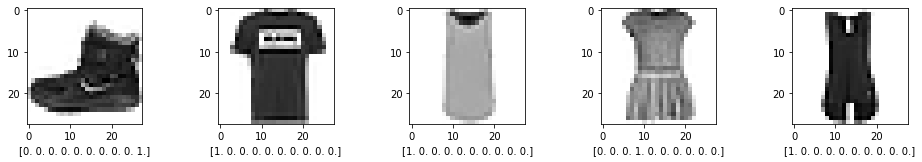

In [9]:
#printing a sample images
plt.figure(figsize=(20,20))
#showing 5 images
for i in range(5):
    plt.subplot(8,6, i+1)
    plt.imshow(np.array(X_train[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

*your answer here*

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [10]:
model = Sequential()

drop = 0.25
leaky = tf.keras.layers.LeakyReLU(alpha=0.001)
relu = tf.keras.layers.ReLU()



model = Sequential()
#input
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1),padding='same', activation=relu, input_shape=(28, 28, 1)))
model.add(BatchNormalizationV2())

#deep convolution layers with batch normalization a
model.add(Conv2D(filters=128,kernel_size=(5,5), strides=(1,1),padding='same',activation=relu))
model.add(BatchNormalizationV2())
model.add(Dropout(drop))

model.add(Conv2D(filters=128,kernel_size=(5,5), strides=(1,1),padding='same',activation=relu))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(drop))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),padding='same', activation=relu))
model.add(BatchNormalizationV2())
model.add(Dropout(drop))

model.add(Conv2D(filters=512,kernel_size=(5,5), strides=(1,1),padding='same',activation=relu))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(drop))

model.add(Conv2D(filters=512, kernel_size=(5,5), strides=(1,1),padding='same', activation=relu))
model.add(BatchNormalizationV2())
model.add(Dropout(drop))


model.add(Flatten())
model.add(Dense(256,activation=relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalizationV2())
model.add(Dropout(0.5))

model.add(Dense(128,activation=relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))

model.add(Dense(10, activation="softmax"))

In [11]:

# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
#creating different optimization algorithms for experimentation with some customised tuning
rms = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-04, decay=1e-06)
sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

#I was compiling the model outside kf loop where I found out from my experiments that I have to compile the model inside the for loop to do it properly.
# model.compile(optimizer=adam,
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

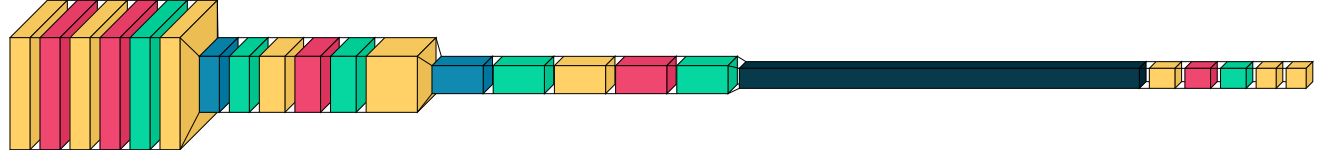

In [12]:
#visualizing my custom DCNN model, beacuse it looks pretty
visualkeras.layered_view(model)

Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [13]:
#Data augmentation for reducing loss value whilst training and validation steps
data_generator = ImageDataGenerator(
                                    rotation_range=8,
                                    zoom_range=0.1, 
                                    shear_range=0.3,
                                    width_shift_range=0.08,
                                    height_shift_range=0.08,
                                    vertical_flip=True)



In [182]:
from sklearn.utils import shuffle
#determining the number of n_splits, epochs and batch sizes for the model
n_splits=3
epochs=10
batch_size=1000


#save models so that multiple models can be tested 
model_history = []
#save the model history in a list after fitting so that it can be plotted later
model_vals_history = []

#k-fold cross validation

import numpy as np
from sklearn.model_selection import cross_validate

X = X_train
y = y_train
kf = KFold(n_splits,shuffle=True,random_state=42)

In [183]:
#for loop to train each k-fold with its own DCNN model 

for training, validation in kf.split(X):
    print("TRAIN:", training, "Validation:", validation)
    X_t, X_v = X[training], X[validation]
    y_t, y_v = y[training], y[validation]

    # normalisation of the pixel values from 0-255 range to 0-1 range 
    X_t = X_t.astype('float32')
    X_v = X_v.astype('float32')
    X_t = X_t / 255
    X_v = X_v / 255

    model.compile(optimizer=adam,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

    # data_generator.fit(X_t)
    model_vals_history.append(model.fit(data_generator.flow(X_t,
                                                  y_t,
                                                  batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_v, y_v),
                              shuffle=True,
                              verbose=1,
                              steps_per_epoch=X_t.shape[0] // batch_size,
                              callbacks=[LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)]
                              ))

    model_history.append(model)
print("======="*12, end="\n\n\n")

TRAIN: [    0     2     3 ... 59996 59997 59998] Validation: [    1     4     6 ... 59989 59992 59999]
Epoch 1/10
40/40 [==============================] - 13s 284ms/step - loss: 0.0765 - accuracy: 0.9913 - val_loss: 0.0849 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 2/10
40/40 [==============================] - 11s 279ms/step - loss: 0.0993 - accuracy: 0.9878 - val_loss: 0.0970 - val_accuracy: 0.9883 - lr: 9.0000e-04
Epoch 3/10
40/40 [==============================] - 11s 283ms/step - loss: 0.0930 - accuracy: 0.9894 - val_loss: 0.0794 - val_accuracy: 0.9948 - lr: 8.1000e-04
Epoch 4/10
40/40 [==============================] - 11s 279ms/step - loss: 0.0887 - accuracy: 0.9905 - val_loss: 0.0695 - val_accuracy: 0.9968 - lr: 7.2900e-04
Epoch 5/10
40/40 [==============================] - 11s 278ms/step - loss: 0.0837 - accuracy: 0.9909 - val_loss: 0.0888 - val_accuracy: 0.9880 - lr: 6.5610e-04
Epoch 6/10
40/40 [==============================] - 11s 283ms/step - loss: 0.0771 - accuracy: 0.9915 

Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [185]:
score = []
for i in model_history:
  eval = i.evaluate(X_test,y_test)
  score.append(eval)

print('Loss: ',(eval))
print('Accuracy: ',(eval))

313/313 [==============================] - 1s 4ms/step - loss: 600.6911 - accuracy: 0.3090
Loss:  [600.6911010742188, 0.3089999854564667]
Accuracy:  [600.6911010742188, 0.3089999854564667]


In [186]:
model_history[2].evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 600.6911 - accuracy: 0.3090


[600.6911010742188, 0.3089999854564667]

In [187]:
#in this code block, I am taking tha average of each accuracy and loss values from every epoch in the training process
#then taking the mean of all average value

avg_train_accuracy = list()
avg_training_loss = list()
avg_test_accuracy = list()
avg_testing_loss = list()

for i in model_vals_history:

    avg_acc = sum(i.history['accuracy'])/len(i.history['accuracy'])
    avg_train_accuracy.append(avg_acc)
                                                            
    avg_loss = sum(i.history['loss'])/len(i.history['loss'])
    avg_training_loss.append(avg_loss)
                                                            
    val_acc = sum(i.history['val_accuracy'])/len(i.history['val_accuracy'])
    avg_test_accuracy.append(val_acc)

    val_acc = sum(i.history['val_loss'])/len(i.history['val_loss'])
    avg_testing_loss.append(val_acc)

print('Avereage Results: ')
print('Training Accuracy')
print(sum(avg_train_accuracy)/len(avg_train_accuracy))
print('Training Loss')
print(sum(avg_training_loss)/len(avg_training_loss))
print('Validation Accuracy')
print(sum(avg_test_accuracy)/len(avg_test_accuracy))
print('Validation Loss')
print(sum(avg_testing_loss)/len(avg_testing_loss))
    

Avereage Results: 
Training Accuracy
0.99048499862353
Training Loss
0.08192786450187366
Validation Accuracy
0.9952194492022196
Validation Loss
0.06862882052858671


In [188]:
model_history[0]

*your answer here*

Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

In [ ]:
#zipping and saving the keras model
#!zip -r /content/mnist-fashion-model-DL-A1.zip /content/mnist-fashion-model-DL-A1

  adding: content/mnist-fashion-model-DL-A1/ (stored 0%)
  adding: content/mnist-fashion-model-DL-A1/assets/ (stored 0%)
  adding: content/mnist-fashion-model-DL-A1/keras_metadata.pb (deflated 93%)
  adding: content/mnist-fashion-model-DL-A1/saved_model.pb (deflated 90%)
  adding: content/mnist-fashion-model-DL-A1/variables/ (stored 0%)
  adding: content/mnist-fashion-model-DL-A1/variables/variables.index (deflated 70%)
  adding: content/mnist-fashion-model-DL-A1/variables/variables.data-00000-of-00001 (deflated 10%)


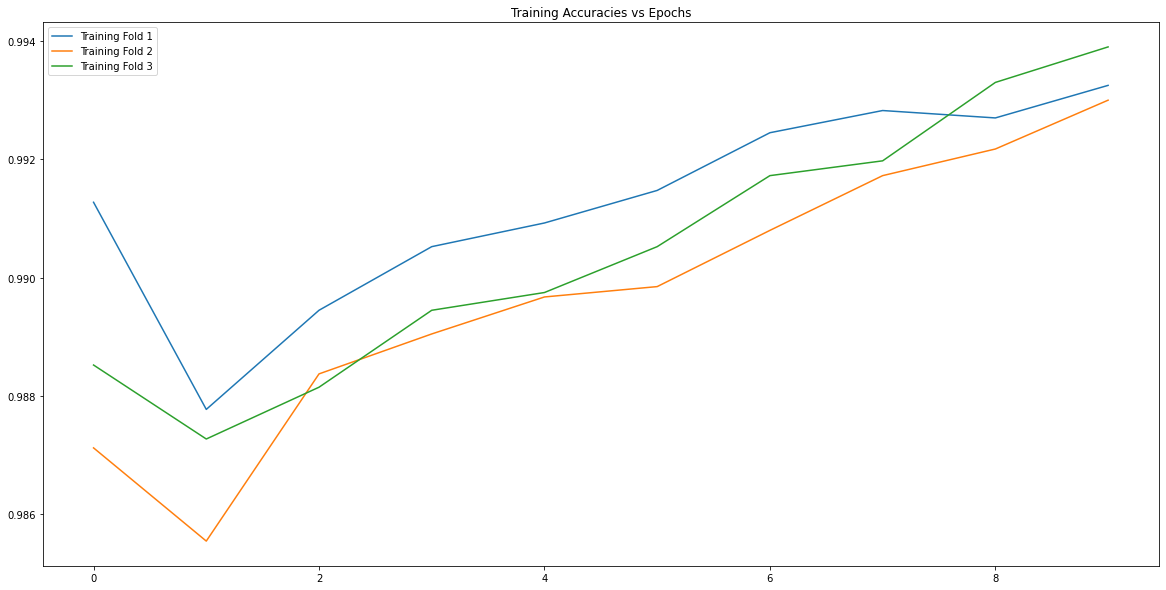

In [191]:
plt.figure(figsize=(20,10))
plt.title('Training Accuracies vs Epochs')
plt.plot(model_vals_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_vals_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_vals_history[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

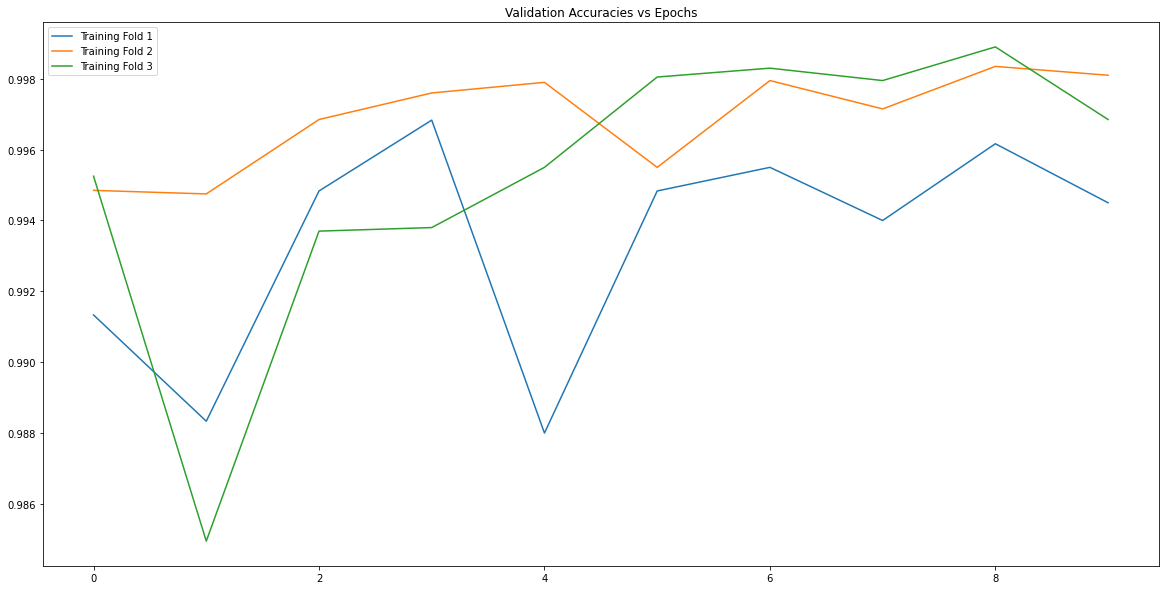

In [192]:
plt.figure(figsize=(20,10))
plt.title('Validation Accuracies vs Epochs')
plt.plot(model_vals_history[0].history['val_accuracy'], label='Training Fold 1')
plt.plot(model_vals_history[1].history['val_accuracy'], label='Training Fold 2')
plt.plot(model_vals_history[2].history['val_accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

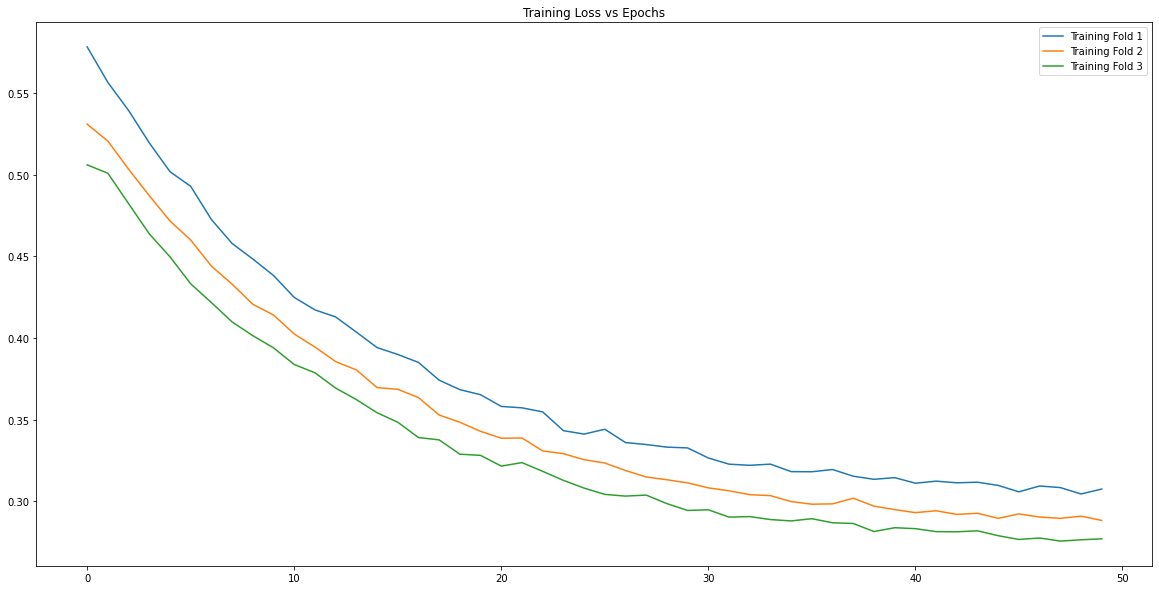

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Training Loss vs Epochs')
plt.plot(model_history[0].history['loss'], label='Training Fold 1')
plt.plot(model_history[1].history['loss'], label='Training Fold 2')
plt.plot(model_history[2].history['loss'], label='Training Fold 3')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Validation Loss vs Epochs')
plt.plot(model_history[0].history['val_loss'], label='Training Fold 1')
plt.plot(model_history[1].history['val_loss'], label='Training Fold 2')
plt.plot(model_history[2].history['val_loss'], label='Training Fold 3')
plt.legend()
plt.show()

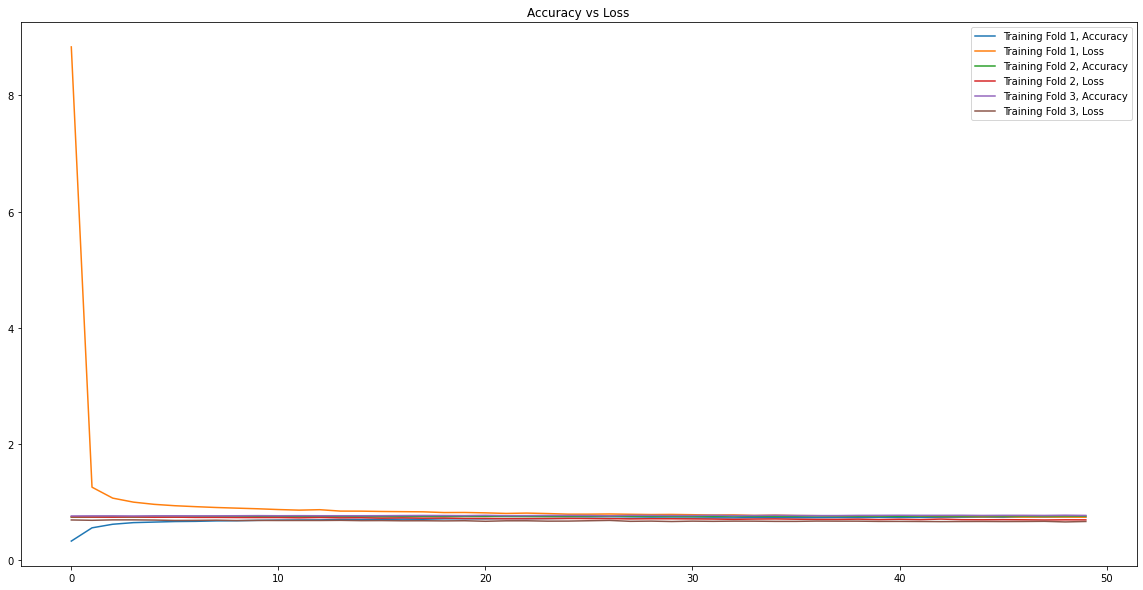

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Accuracy vs Loss')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1, Accuracy')
plt.plot(model_history[0].history['loss'], label='Training Fold 1, Loss')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2, Accuracy')
plt.plot(model_history[1].history['loss'], label='Training Fold 2, Loss')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3, Accuracy')
plt.plot(model_history[2].history['loss'], label='Training Fold 3, Loss')
plt.legend()
plt.show()

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**


When I trained the model withput applying any regularization method such as dropout or L1/L2 methods, on training process the model overfitted meaning that it learned so many correlations on training process it would not be able to perform good on validation part. After appyling the regularizations methods above,  the model has showed better results (+80% accuracy).
*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

*your answer here*

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

